# Descriptive Statistics Review

## Before you start:

- Read the README.md file
- Comment as much as you can
- Happy learning!

## Context

![img](./diamonds.jpg)

In this lab we are going to work with data to understand the characteristics of a diamond that are most likely to influence its price. In this first part of the lab, we will explore and clean our data. 

The dataset we will be using is comprised of approximately 54k rows and 11 different columns. As always, a row represents a single observation (in this case a diamond) and each of the columns represent a different feature of a diamond.

The following codebook was provided together with the dataset to clarify what each column represents:


| Column  | Description  |
|---|---|
| Price  | Price in US dollars (326-18,823)  |
| Carat  | Weight of the diamond (0.2--5.01)  |
| Cut  | Quality of the cut (Fair, Good, Very Good, Premium, Ideal)  |
| Color  | Diamond colour, from J (worst) to D (best)  |
| Clarity  | A measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))   |
| x  | Length in mm (0--10.74)  |
| y  | Width in mm (0--58.9)  |
| z  | Depth in mm (0--31.8)  |
| Depth  | Total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)  |
| Table  | Width of top of diamond relative to widest point (43--95)  |

## Libraries
Pandas and numpy will be needed for the analysis of the data. Don't worry about the seaborn and matplotlib import at the moment, you will learn more about them next week, but we will be using some of their functionalities.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

First import the data from the .csv file provided and assign it to a variable named `diamonds` and drop the column with the index.

In [2]:
#your code here
diamonds = pd.read_csv('diamonds.csv')

# 1. Taking the first look at the data.
Let's see how the data looks by using pandas methods like `head()`, `info()` and `describe()`. 

**First, use the `head` method.**

In [3]:
#your code here
diamonds.head()

Unnamed: 0  carat      cut color clarity  depth  table  price     x     y  \
0           1   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98   
1           2   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84   
2           3   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07   
3           4   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23   
4           5   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35   

      z  
0  2.43  
1  2.31  
2  2.31  
3  2.63  
4  2.75

We can see the first 5 rows of the dataset using the `head` method. This by itself doesn't tell us much about the data that we have, but we can have a first look at the features (columns) and some of the values that each one takes.

**What do you see? Make some comments about the values you see in each column, comparing them with the codebook. Is that what you would expect for these variables?**

In [4]:
#your code here
"""
yes, except for the values in color, x,y,z and depth and table

They could have been given direct name like color_compare , length,width and depth and 
depth as depth percentage

"""


'\nyes, except for the values in color, x,y,z and depth and table\n\nThey could have been given direct name like color_compare , length,width and depth and \ndepth as depth percentage\n\n'

It is very important to know the amount of data we have, because everything will depend on that, from the quality of the analysis to the choice of our infrastracture.

**Check the shape of the data**

In [5]:
#your code here
diamonds.shape

(53940, 11)

The `clarity` column is confusing because we are not diamond experts. Let's create a new column with a new scale that is more understandable for us.

**Create a new column with numbers from 0 to 7. The lowest would be 0 with value `I1` and the greatest 7 with value `IF`**

In [6]:
#your code here
clarity_scale = { 'I1':'0', 'SI2':'1', 'SI1':'2','VS2':'3', 'VS1':'4','VVS2': '5','VVS1':'6','IF':'7'}
diamonds['Clarity_scale']= diamonds['clarity'].map(clarity_scale)
diamonds.head()

Unnamed: 0  carat      cut color clarity  depth  table  price     x     y  \
0           1   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98   
1           2   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84   
2           3   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07   
3           4   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23   
4           5   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35   

      z Clarity_scale  
0  2.43             1  
1  2.31             2  
2  2.31             4  
3  2.63             3  
4  2.75             1

It makes sense to do the same with the `color` column.

**Do the same with values from 0 to 6. Read the codebook to see the match**

In [7]:
#your code here
color_scale = { 'J':'0', 'I':'1', 'H':'2','G':'3', 'F':'4','E': '5','D':'6'}
diamonds['Color_scale']= diamonds['color'].map(color_scale)
diamonds.head()

Unnamed: 0  carat      cut color clarity  depth  table  price     x     y  \
0           1   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98   
1           2   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84   
2           3   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07   
3           4   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23   
4           5   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35   

      z Clarity_scale Color_scale  
0  2.43             1           5  
1  2.31             2           5  
2  2.31             4           5  
3  2.63             3           1  
4  2.75             1           0

With the `info` method, we can see the features of the dataset, and the amount of observations (rows) that have a non-null value and the types of the features. 

**Now use the `info` method and comparing with the shape, comment on what you see**

In [8]:
#your code here
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     53940 non-null  int64  
 1   carat          53940 non-null  float64
 2   cut            53940 non-null  object 
 3   color          53940 non-null  object 
 4   clarity        53940 non-null  object 
 5   depth          53940 non-null  float64
 6   table          53940 non-null  float64
 7   price          53940 non-null  int64  
 8   x              53940 non-null  float64
 9   y              53940 non-null  float64
 10  z              53940 non-null  float64
 11  Clarity_scale  53940 non-null  object 
 12  Color_scale    53940 non-null  object 
dtypes: float64(6), int64(2), object(5)
memory usage: 5.4+ MB


In the last line of the info output, you have some information about the types of the columns. As you know, it is a good idea to check if the types of each column is what you expect. If a column has the right type, we will be able to do all the operations that we want to do. 

For instance, if we have a column that is a `date` with a `string` format, we will have the data but we won't be able to do a simple operation, such as format the date the way that we would like.

Changing the data type to the one we needs can help us to solve a lot of problems in our data.

**Check the types of each column and comment if it matches with the expected**

In [9]:
#your code here
# changing the datatypes of newly created column to int so that we can perform mathematical operation if required
#Changing the datatype index of unnamed to object as it does not need any operation
diamonds['Clarity_scale'] = diamonds['Clarity_scale'].astype('int64')
diamonds['Color_scale'] = diamonds['Color_scale'].astype('int64')
diamonds['Unnamed: 0'] = diamonds['Color_scale'].astype('object')

In [10]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     53940 non-null  object 
 1   carat          53940 non-null  float64
 2   cut            53940 non-null  object 
 3   color          53940 non-null  object 
 4   clarity        53940 non-null  object 
 5   depth          53940 non-null  float64
 6   table          53940 non-null  float64
 7   price          53940 non-null  int64  
 8   x              53940 non-null  float64
 9   y              53940 non-null  float64
 10  z              53940 non-null  float64
 11  Clarity_scale  53940 non-null  int64  
 12  Color_scale    53940 non-null  int64  
dtypes: float64(6), int64(3), object(4)
memory usage: 5.4+ MB


# 2. A deeper look: checking the basic statistics.

The `describe` method gives us an overview of our data. From here we can see all the descriptive metrics for our variables.

**Use the `describe` method and comment on what you see**

In [11]:
#your code and comments here
diamonds.describe()

carat         depth         table         price             x  \
count  53940.000000  53940.000000  53940.000000  53940.000000  53940.000000   
mean       0.797940     61.749405     57.457184   3932.799722      5.731157   
std        0.474011      1.432621      2.234491   3989.439738      1.121761   
min        0.200000     43.000000     43.000000    326.000000      0.000000   
25%        0.400000     61.000000     56.000000    950.000000      4.710000   
50%        0.700000     61.800000     57.000000   2401.000000      5.700000   
75%        1.040000     62.500000     59.000000   5324.250000      6.540000   
max        5.010000     79.000000     95.000000  18823.000000     10.740000   

                  y             z  Clarity_scale   Color_scale  
count  53940.000000  53940.000000   53940.000000  53940.000000  
mean       5.734526      3.538734       3.051020      3.405803  
std        1.142135      0.705699       1.647136      1.701105  
min        0.000000      0.000000       0.000000      0.000000  
25%        4.720000      2.910000       2.000000      2.000000  
50%        5.710000      3.530000       3.000000      3.000000  
75%        6.540000      4.040000       4.000000      5.000000  
max       58.900000     31.800000       7.000000      6.000000

You have probably noticed that the columns x, y and z have a minimum value of 0. This means that there are one or more rows (or observations) in our dataset that are supposedly representing a diamond that has lenght, width or depth of 0. Considering that we're talking about a physical object, this is impossible!

Now let's proceed to check the rows that have a value of 0 in any of the x, y or z columns. By doing this we want to check if the data we are missing can be obtained using the data that we do have.

**Check the columns with `x`, `y` and `z` with value 0 in all of them and comment what you see**

In [12]:
#your code here
test = diamonds[(diamonds['x']==0) | (diamonds['y']==0) | (diamonds['z']==0)]
test[["Unnamed: 0", "carat","depth","table","price","x","y","z","Clarity_scale","Color_scale"]]

Unnamed: 0  carat  depth  table  price     x     y    z  Clarity_scale  \
2207           3   1.00   59.1   59.0   3142  6.55  6.48  0.0              1   
2314           2   1.01   58.1   59.0   3167  6.66  6.60  0.0              0   
4791           3   1.10   63.0   59.0   3696  6.50  6.47  0.0              1   
5471           4   1.01   59.2   58.0   3837  6.50  6.47  0.0              1   
10167          3   1.50   64.0   61.0   4731  7.15  7.04  0.0              0   
11182          4   1.07   61.6   56.0   4954  0.00  6.62  0.0              1   
11963          2   1.00   63.3   53.0   5139  0.00  0.00  0.0              3   
13601          3   1.15   59.2   56.0   5564  6.88  6.83  0.0              3   
15951          3   1.14   57.5   67.0   6381  0.00  0.00  0.0              4   
24394          2   2.18   59.4   61.0  12631  8.49  8.45  0.0              1   
24520          3   1.56   62.2   54.0  12800  0.00  0.00  0.0              3   
26123          1   2.25   61.3   58.0  15397  8.52  8.42  0.0              2   
26243          6   1.20   62.1   59.0  15686  0.00  0.00  0.0              6   
27112          2   2.20   61.2   59.0  17265  8.42  8.37  0.0              2   
27429          2   2.25   62.8   59.0  18034  0.00  0.00  0.0              1   
27503          2   2.02   62.7   53.0  18207  8.02  7.95  0.0              3   
27739          3   2.80   63.8   58.0  18788  8.90  8.85  0.0              1   
49556          4   0.71   64.1   60.0   2130  0.00  0.00  0.0              1   
49557          4   0.71   64.1   60.0   2130  0.00  0.00  0.0              1   
51506          3   1.12   60.4   59.0   2383  6.71  6.67  0.0              0   

       Color_scale  
2207             3  
2314             2  
4791             3  
5471             4  
10167            3  
11182            4  
11963            2  
13601            3  
15951            3  
24394            2  
24520            3  
26123            1  
26243            6  
27112            2  
27429            2  
27503            2  
27739            3  
49556            4  
49557            4  
51506            3

In [13]:
#dropping rows with x , y and z all having zeros
diamonds = diamonds.drop(diamonds[(diamonds['x'] == 0) | (diamonds['z'] == 0) & (diamonds['y'] == 0)].index)

As you can see, we have 20 rows that have a value of 0 in some or all the aforementioned columns.
Most of them (12) are missing the z value, which we can obtain using the columns depth, x and y. 

20 rows with issues represent just 0.03% of our data (20 out of 53940) so it wouldn't be a big deal to remove them. Still, lets try to keep all the data we have. 

For those 12 rows, we will create a function that applies the formula given in the codebook and get the value of z. We will drop the other rows (8), since they are missing all 3 values or 2 of them.

**Create a function named `calculate_z` that applies the function in the codebook to one single row you give to the function**

In [14]:
#your code here
def claculate_z(row):
    if row.z == 0:
        return (((row.x + row.y)* row.depth* 0.01 /2))
    else:
        return row.z


**Apply it just to the rows with incorrect values**

In [15]:
#your code here
diamonds['z'] = diamonds.apply(lambda row:claculate_z(row), axis=1)
diamonds['z']

0        2.43
1        2.31
2        2.31
3        2.63
4        2.75
         ... 
53935    3.50
53936    3.61
53937    3.56
53938    3.74
53939    3.64
Name: z, Length: 53932, dtype: float64

If we leave the other 8 values as they are, it would negatively affect our analysis, because these are data that do not make logical sense. Therefore it is better to consider those values as NaN values, since they are probably the result of a mistake or error during process of measuring and storing these values in a dataset.

To replace them we can use the pandas .replace() method and np.NaN.

**Replace the zero values in the `z` column for a NaN**

In [16]:
"""
We drop the other rows (8), since they are missing all 3 values or 2 of them.
"""

'\nWe drop the other rows (8), since they are missing all 3 values or 2 of them.\n'

----
# Bonus: check the new z values
Since we need to be 100% sure of our data, let's create a function that validates our z. To do so, we will use the same formula, but this time we will calculate the value of depth with the new value assigned to z.

**Create a function named `validate_z` that compares the `z`  in cells above with the one thrown by the formula and run it with the rows you changed in the cells above**

In [17]:
#your code here

Let's check the data again with the `describe()` method.

The minimum value for x, y and z should now be a positive number, as it should be for the physical measurements of an object.

Let's finish by checking for NaN values in the data. Since we introduced them ourselves using 'replace', we will surely find some, but there may be more that are unrelated to the x, y and z columns. Checking NaNs is a fundamental part of data cleaning and it's always better to do this kind of operations before proceeding with analysis.

**Check how many NaNs do you have, comment what you would do with those values, and then do so**

In [18]:
#your code here

# 3. Checking for outliers
Now we are going to revisit the summary table to check for outliers.

**Use the `describe` method again and comment on what you see. After that, check if you have any outliers** 

In [19]:
#your code here
stats = diamonds.describe().transpose()
stats['IQR'] = stats['75%'] - stats['25%']
stats

count         mean          std     min     25%      50%  \
carat          53932.0     0.797879     0.473986    0.20    0.40     0.70   
depth          53932.0    61.749336     1.432514   43.00   61.00    61.80   
table          53932.0    57.457029     2.234064   43.00   56.00    57.00   
price          53932.0  3932.136079  3988.734835  326.00  949.75  2401.00   
x              53932.0     5.732007     1.119670    3.73    4.71     5.70   
y              53932.0     5.735254     1.140343    3.68    4.72     5.71   
z              53932.0     3.540265     0.702667    1.07    2.91     3.53   
Clarity_scale  53932.0     3.051101     1.647109    0.00    2.00     3.00   
Color_scale    53932.0     3.405789     1.701165    0.00    2.00     3.00   

                   75%       max      IQR  
carat             1.04      5.01     0.64  
depth            62.50     79.00     1.50  
table            59.00     95.00     3.00  
price          5324.00  18823.00  4374.25  
x                 6.54     10.74     1.83  
y                 6.54     58.90     1.82  
z                 4.04     31.80     1.13  
Clarity_scale     4.00      7.00     2.00  
Color_scale       5.00      6.00     3.00

In [20]:
#your comments here
"""
The price and the z value seems to be outlier
"""

'\nThe price and the z value seems to be outlier\n'

To manage these outliers, we are going to filter our DataFrame, we're going to take all the values that have a price higher than the 75th percentile.

**Look for that quantile and filter the dataframe to clearly see the outliers. What do you think?**

In [21]:
#your code here
filter_price = diamonds[diamonds.price < np.percentile(diamonds.price,75)]
filter_price

Unnamed: 0  carat        cut color clarity  depth  table  price     x  \
0              5   0.23      Ideal     E     SI2   61.5   55.0    326  3.95   
1              5   0.21    Premium     E     SI1   59.8   61.0    326  3.89   
2              5   0.23       Good     E     VS1   56.9   65.0    327  4.05   
3              1   0.29    Premium     I     VS2   62.4   58.0    334  4.20   
4              0   0.31       Good     J     SI2   63.3   58.0    335  4.34   
...          ...    ...        ...   ...     ...    ...    ...    ...   ...   
53935          6   0.72      Ideal     D     SI1   60.8   57.0   2757  5.75   
53936          6   0.72       Good     D     SI1   63.1   55.0   2757  5.69   
53937          6   0.70  Very Good     D     SI1   62.8   60.0   2757  5.66   
53938          2   0.86    Premium     H     SI2   61.0   58.0   2757  6.15   
53939          6   0.75      Ideal     D     SI2   62.2   55.0   2757  5.83   

          y     z  Clarity_scale  Color_scale  
0      3.98  2.43              1            5  
1      3.84  2.31              2            5  
2      4.07  2.31              4            5  
3      4.23  2.63              3            1  
4      4.35  2.75              1            0  
...     ...   ...            ...          ...  
53935  5.76  3.50              2            6  
53936  5.75  3.61              2            6  
53937  5.68  3.56              2            6  
53938  6.12  3.74              1            2  
53939  5.87  3.64              1            6  

[40446 rows x 13 columns]

Our dataset is really big and the outliers are really far apart from the rest of the values. To see this more clearly we will use a boxplot, which plots the median, 25th and 75th quartile, the maximum and minimum, as well as any outliers.

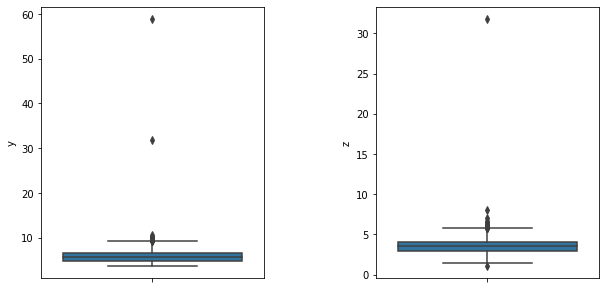

In [22]:
#Run this code
fig, ax = plt.subplots(1,2, figsize=(10, 5))
sns.boxplot(y=diamonds.y, ax=ax[0])
sns.boxplot(y=diamonds.z, ax=ax[1])
plt.subplots_adjust(wspace=0.5)

In [23]:
diamonds.loc[48410]

Unnamed: 0               5
carat                 0.51
cut              Very Good
color                    E
clarity                VS1
depth                 61.8
table                 54.7
price                 1970
x                     5.12
y                     5.15
z                     31.8
Clarity_scale            4
Color_scale              5
Name: 48410, dtype: object

Now we can see that all the values are within an acceptable range, but we have 2 big outliers in y and 1 in z. Now we know that our max values for y should be around 10 and the values for z should be around 6, so let's filter our dataset to find values higher than 10 in it.


In [24]:
#your code here
filtered_column = diamonds[(diamonds['z'] > 10)]
filtered_column

Unnamed: 0  carat        cut color clarity  depth  table  price     x  \
48410          5   0.51  Very Good     E     VS1   61.8   54.7   1970  5.12   

          y     z  Clarity_scale  Color_scale  
48410  5.15  31.8              4            5

In [25]:
#change the values of z to zero

diamonds.z[diamonds.z > 10] = 0


C:\Users\sudis\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Now that we have found the outlier, let's use the function we defined earlier to correct this value. First, we need to change the value to 0 (because that's how we defined the function before) and then we will apply it.

**Apply `calculate_z` for the row with the outlier**

In [42]:
#your code here
diamonds['z'] = diamonds.apply(lambda row:claculate_z(row), axis=1)
diamonds.loc[48410]

Unnamed: 0               5
carat                 0.51
cut              Very Good
color                    E
clarity                VS1
depth                 61.8
table                 54.7
price                 1970
x                     5.12
y                     5.15
z                  3.17343
Clarity_scale            4
Color_scale              5
Name: 48410, dtype: object

Let's check if we actually corrected the outlier.

Cool! Now let's validate our new `z`. We will check if we obtain the same value of depth using our validate function. If the formula applies, this means could approximate the real value of `z`.

**Apply `validate_z` to the row used earlier**

In [43]:
#your code here
def validate_z(row):
    if row.depth == (2 * row.z * 100 /(row.x + row.y)):
        return True
    else:
        return False
diamonds_d = diamonds.apply(lambda row:validate_z(row), axis=1)


Now let's do the same for `y`. First, let's filter the DataFrame to find the outliers. We said that the maximum values should be around 10, so let's check what are the values above 10.

**Check the values greater than 10 in the `y` column** 

In [44]:
#your code here
filtered_column = diamonds[(diamonds['y'] > 10)]
filtered_column

Unnamed: 0  carat      cut color clarity  depth  table  price      x  \
24067          2   2.00  Premium     H     SI2   58.9   57.0  12210   8.09   
25998          1   4.01  Premium     I      I1   61.0   61.0  15223  10.14   
27415          0   5.01     Fair     J      I1   65.5   59.0  18018  10.74   
27630          0   4.50     Fair     J      I1   65.8   58.0  18531  10.23   
49189          5   0.51    Ideal     E     VS1   61.8   55.0   2075   5.15   

           y     z  Clarity_scale  Color_scale  
24067  58.90  8.06              1            2  
25998  10.10  6.17              0            1  
27415  10.54  6.98              0            0  
27630  10.16  6.72              0            0  
49189  31.80  5.12              4            5

In [45]:
diamonds.loc[24067]

Unnamed: 0             2
carat                  2
cut              Premium
color                  H
clarity              SI2
depth               58.9
table                 57
price              12210
x                   8.09
y                   58.9
z                   8.06
Clarity_scale          1
Color_scale            2
Name: 24067, dtype: object

We can clearly see that the 31.8 in row 49189 is an outlier for the y value. Also, we can see that the 58.9 value for `y` in row 24067 is actually its depth, so it was a mistake when they introduced the data. Let's create a function to fix these outliers.

**Create a function named `calculate_y` to calculate `y` using `z` and `x` the same way you did above**

In [46]:
#change the values of z to zero

diamonds.y[diamonds.y > 10] = 0

C:\Users\sudis\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [47]:
#your code here
def claculate_y(row):
    if row.y == 0:
        return (((2 * row.z *100)/ row.depth ) - row.x)
    else:
        return row.y

diamonds['y'] = diamonds.apply(lambda row:claculate_y(row), axis=1)
diamonds.loc[24067]

Unnamed: 0             2
carat                  2
cut              Premium
color                  H
clarity              SI2
depth               58.9
table                 57
price              12210
x                   8.09
y                19.2784
z                   8.06
Clarity_scale          1
Color_scale            2
Name: 24067, dtype: object

In [49]:
filtered_column = diamonds[(diamonds['y'] > 10)]
filtered_column

Unnamed: 0  carat      cut color clarity  depth  table  price      x  \
24067          2   2.00  Premium     H     SI2   58.9   57.0  12210   8.09   
25998          1   4.01  Premium     I      I1   61.0   61.0  15223  10.14   
27415          0   5.01     Fair     J      I1   65.5   59.0  18018  10.74   
27630          0   4.50     Fair     J      I1   65.8   58.0  18531  10.23   
49189          5   0.51    Ideal     E     VS1   61.8   55.0   2075   5.15   

               y     z  Clarity_scale  Color_scale  
24067  19.278421  8.06              1            2  
25998  10.089508  6.17              0            1  
27415  10.572977  6.98              0            0  
27630  10.195532  6.72              0            0  
49189  11.419579  5.12              4            5

In [ ]:
"""
Yes the values have changed but they are still greater than 10 its because they have more length that is x
"""

We will check the rows that had an outlier in `y`, to check that the values were changed.

**Check those rows (also validating with your function) and comment what you see**

Now that we have corrected or dropped all of our outliers, lets plot another box plot to double check.

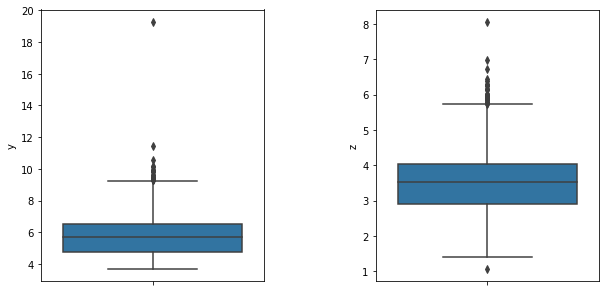

In [48]:
#Run this code
fig, ax = plt.subplots(1,2, figsize=(10, 5))
sns.boxplot(y=diamonds.y, ax=ax[0])
sns.boxplot(y=diamonds.z, ax=ax[1])
plt.subplots_adjust(wspace=0.5)

**What do you think? Are these values more reasonable?**


In [61]:
#your thoughts here
"""
Yes, the y has just one value falling near 18 other are nearer to 10
"""

**Once you are happy with your cleaning, save the cleaned data and continue to csv. Your new csv should be named ``diamonds_clean``**

In [50]:
#your code here
diamonds.head()

Unnamed: 0  carat      cut color clarity  depth  table  price     x     y  \
0          5   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98   
1          5   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84   
2          5   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07   
3          1   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23   
4          0   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35   

      z  Clarity_scale  Color_scale  
0  2.43              1            5  
1  2.31              2            5  
2  2.31              4            5  
3  2.63              3            1  
4  2.75              1            0

In [52]:
#Saving the file

diamonds_clean = diamonds.to_csv('diamonds_clean.csv', index=False)